In [1]:
import requests

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

import koreanize_matplotlib
import pandas as pd

In [ ]:
# mysql module
import mysql.connector

# connect_database( hostname , username , password )
def connect_database(host_name="host_name",user_name="user_name",user_password="user_name"):
    mydb = mysql.connector.connect(
        host = host_name,
        port = 3306,
        user = user_name,
        password = user_password,
        database = "WAY_BACK_HOME"
    )

    cursor = mydb.cursor()

    return mydb, cursor

def close_database(mydb, cursor):
    cursor.close()
    mydb.close()

# 
def excute_query(query):
    mydb, cursor = connect_database()
    try:
        cursor.execute(query);

        if query.strip().lower().startswith("select"):
            return cursor.fetchall()
        else :
            mydb.commit()
            print("success!!!")

    except mysql.connector.Error as err:
        print(err)

    finally:
        close_database(mydb=mydb,cursor=cursor)

#### 뉴스 데이터 차트 츌력

In [8]:
rows = excute_query('select count(date), date from news_titles group by date;')

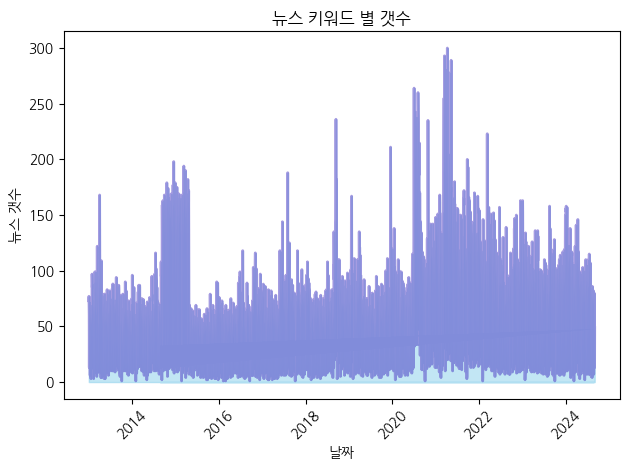

In [20]:
news_count =[]; news_count_date =[];
for row in rows:
    news_count.append(row[0])
    news_count_date.append(row[1])
    
plt.fill_between(news_count_date, news_count, color='skyblue', alpha=0.5)
plt.plot(news_count_date, news_count, color='Slateblue', alpha=0.6, linewidth=2)

# 그래프 제목 및 축 라벨 설정
plt.title('뉴스 키워드 별 갯수')
plt.xlabel('날짜')
plt.ylabel('뉴스 갯수')

# x축 날짜 형식 조정
plt.xticks(rotation=45)

# 그래프 표시
plt.tight_layout()
plt.show()

#### 매매가격지수 차트 출력

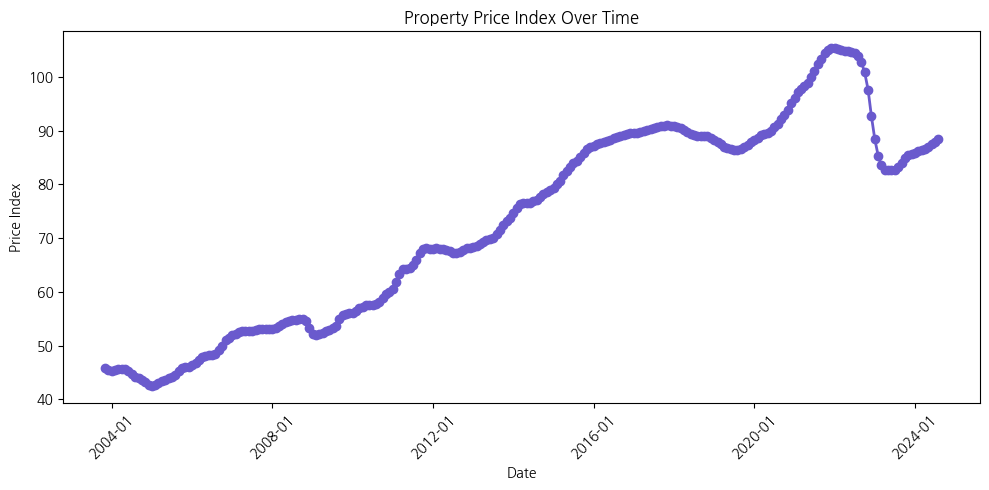

In [46]:
rows = excute_query('select r.region_name, p.date, p.price_index from property_price_index as p, regions as r where p.region_id=r.region_id;')

property_price_df = pd.DataFrame(rows, columns=['region_id','date','price_index'])

property_price_df.set_index('date', inplace=True)

# 그래프 그리기
plt.figure(figsize=(10, 5))
plt.plot(property_price_df.index, property_price_df['price_index'], marker='o', color='Slateblue', linewidth=2)

# X축의 날짜 형식을 월 단위로 조정
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))

# 그래프 제목 및 축 라벨 설정
plt.title('Property Price Index Over Time')
plt.xlabel('Date')
plt.ylabel('Price Index')

# X축 날짜 간격 조정
plt.xticks(rotation=45)

# 그래프 표시
plt.tight_layout()
plt.show()

#### 기준 금리

In [47]:
rows = excute_query('select * from base_interest;')

In [53]:
interest_list = []
interest_list_date = []

interest = rows[0][1]

interest_list_date.append(rows[0][0])
interest_list.append(rows[0][1])

for row in rows:
    if row[1] != interest:
        interest_list_date.append(row[0])
        interest_list.append(row[1])
        interest = row[1]
        

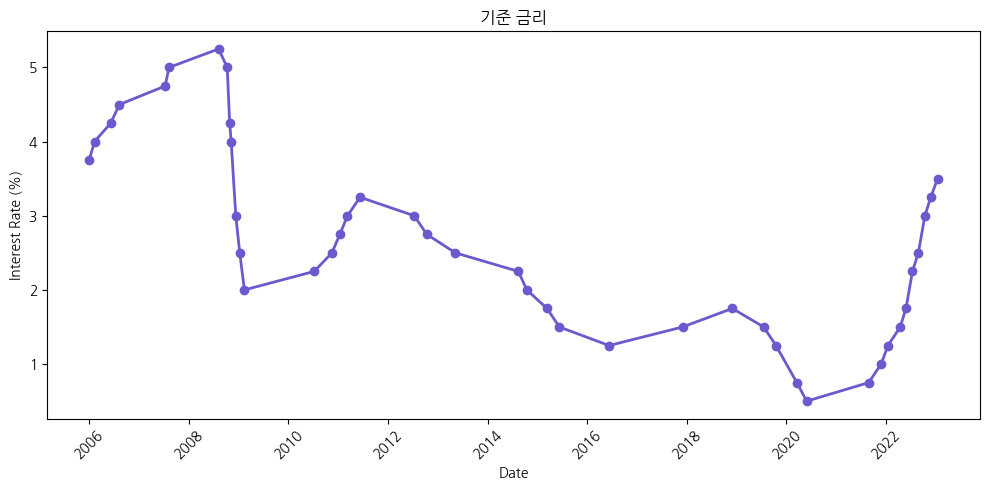

In [62]:

# 그래프 그리기
plt.figure(figsize=(10, 5))
plt.plot(interest_list_date, interest_list, marker='o', color='Slateblue', linewidth=2)

# X축의 날짜 형식 조정
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))

# 그래프 제목 및 축 라벨 설정
plt.title('기준 금리')
plt.xlabel('Date')
plt.ylabel('Interest Rate (%)')

# X축 날짜 간격 조정
plt.xticks(rotation=45)

# 그래프 표시
plt.tight_layout()
plt.show()

#### 매매가지수+전세가율+월별뉴스건수+미분양갯수 차트

> #### 월별뉴스건수: news_titles
> #### 미분양갯수 : unsold_status
> #### 전세가율 : jeonse_price_index
> #### 매매가지수 : property_price_index

In [2]:
news_count_query ="""
select 
    count(date), 
    date 
from news_titles 
group by date;"""

# unsold_status_query ="""select r.region_name, u.date, u.unsold_sum from unsold_status as u, regions as r where u.region_id=r.region_id;"""
unsold_status_query="""
select 
    r.region_name, 
    u.date, 
    u.unsold_sum 
from unsold_status as u, regions as r 
where u.region_id=r.region_id
and region_name='서울';"""

jeonse_price_query ="""
select 
    r.region_name, 
    j.date, 
    j.price_index 
from jeonse_price_index as j, regions as r 
where j.region_id=r.region_id 
and region_name ='서울';"""

property_price_query = """select r.region_name, p.date, p.price_index from property_price_index as p, regions as r where p.region_id=r.region_id and region_name ='서울';"""

In [3]:
def news_keyword_chart():
    rows = excute_query(news_count_query)

    news_count =[]; news_count_date =[];
    for row in rows:
        news_count.append(row[0])
        news_count_date.append(row[1])
        
    plt.fill_between(news_count_date, news_count, color='skyblue', alpha=0.5)
    plt.plot(news_count_date, news_count, color='Slateblue', alpha=0.6, linewidth=2)

    # 그래프 제목 및 축 라벨 설정
    plt.title('뉴스 키워드 별 갯수')
    plt.xlabel('날짜')
    plt.ylabel('뉴스 갯수')

    # x축 날짜 형식 조정
    plt.xticks(rotation=45)

    # 그래프 표시
    plt.tight_layout()
    plt.show()

def property_price_index_chart():
    property_price_df=[]
    rows = excute_query(property_price_query)

    property_price_df = pd.DataFrame(rows, columns=['region_id','date','price_index'])

    property_price_df.set_index('date', inplace=True)

    # 그래프 그리기
    plt.figure(figsize=(10, 5))
    plt.plot(property_price_df.index, property_price_df['price_index'], marker='o', color='red', linewidth=2)

    # X축의 날짜 형식을 월 단위로 조정
    plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))

    # 그래프 제목 및 축 라벨 설정
    plt.title('property_price_index_chart')
    plt.xlabel('Date')
    plt.ylabel('Price Index')

    # X축 날짜 간격 조정
    plt.xticks(rotation=45)

    # 그래프 표시
    plt.tight_layout()
    plt.show()

def unsold_status_chart():
    unsold_status_df =[]

    rows = excute_query(unsold_status_query)

    unsold_status_df = pd.DataFrame(rows, columns=['region_id','date','unsold_sum'])

    unsold_status_df.set_index('date', inplace=True)

        # 그래프 그리기
    plt.figure(figsize=(10, 5))
    plt.plot(unsold_status_df.index, unsold_status_df['unsold_sum'], marker='o', color='green', linewidth=2)

        # X축의 날짜 형식을 월 단위로 조정
    plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))

        # 그래프 제목 및 축 라벨 설정
    plt.title('unsold_status_chart')
    plt.xlabel('Date')
    plt.ylabel('Price unsold_sum')

        # X축 날짜 간격 조정
    plt.xticks(rotation=45)

        # 그래프 표시
    plt.tight_layout()
    plt.show()

def jeonse_price_chart():
    jeonse_price_df =[]

    rows = excute_query(jeonse_price_query)

    jeonse_price_df = pd.DataFrame(rows, columns=['region_id','date','price_index'])

    jeonse_price_df.set_index('date', inplace=True)

        # 그래프 그리기
    plt.figure(figsize=(10, 5))
    plt.plot(jeonse_price_df.index, jeonse_price_df['price_index'], marker='o', color='blue', linewidth=2)

        # X축의 날짜 형식을 월 단위로 조정
    plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))

        # 그래프 제목 및 축 라벨 설정
    plt.title('jeonse_price_query')
    plt.xlabel('Date')
    plt.ylabel('Price price_index')

        # X축 날짜 간격 조정
    plt.xticks(rotation=45)

        # 그래프 표시
    plt.tight_layout()
    plt.show()

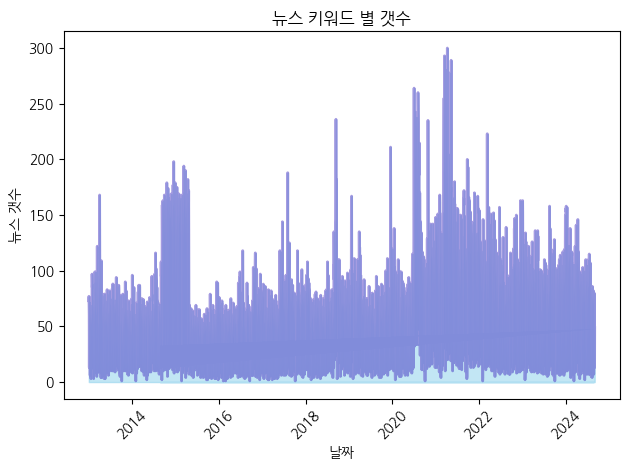

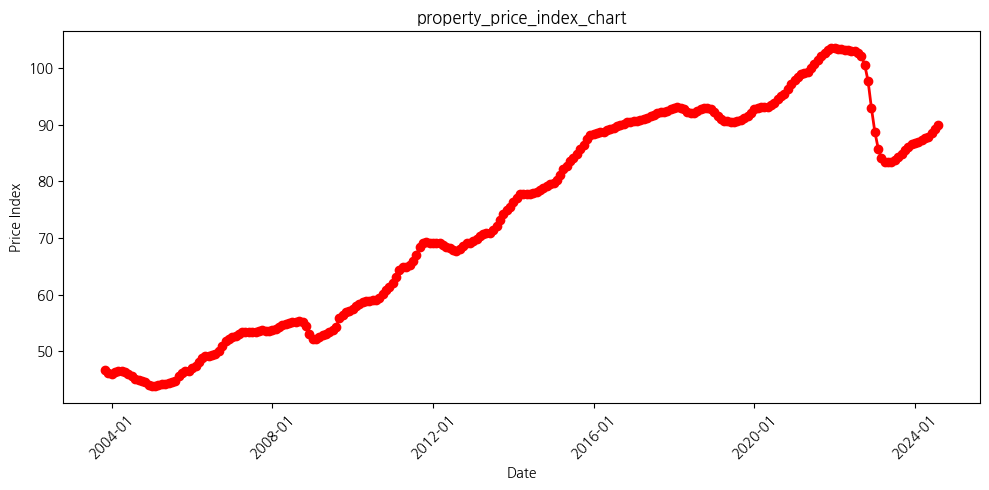

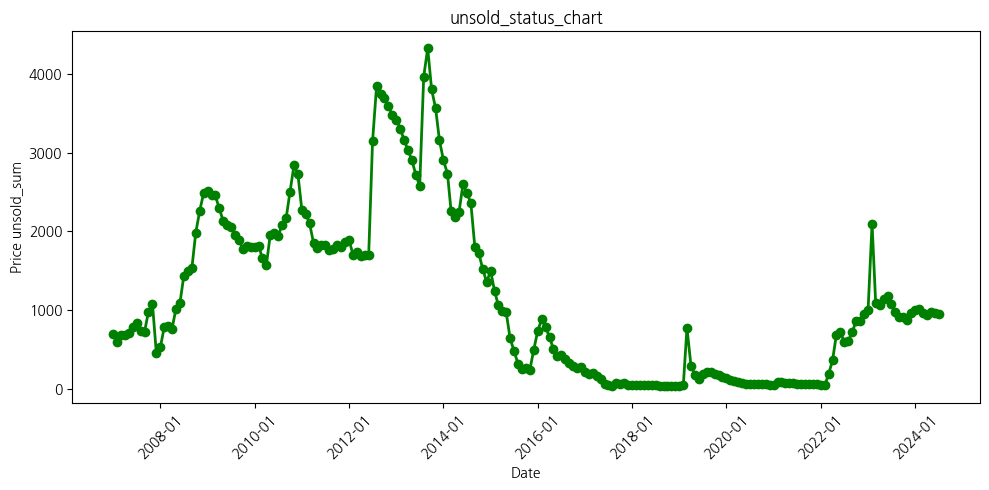

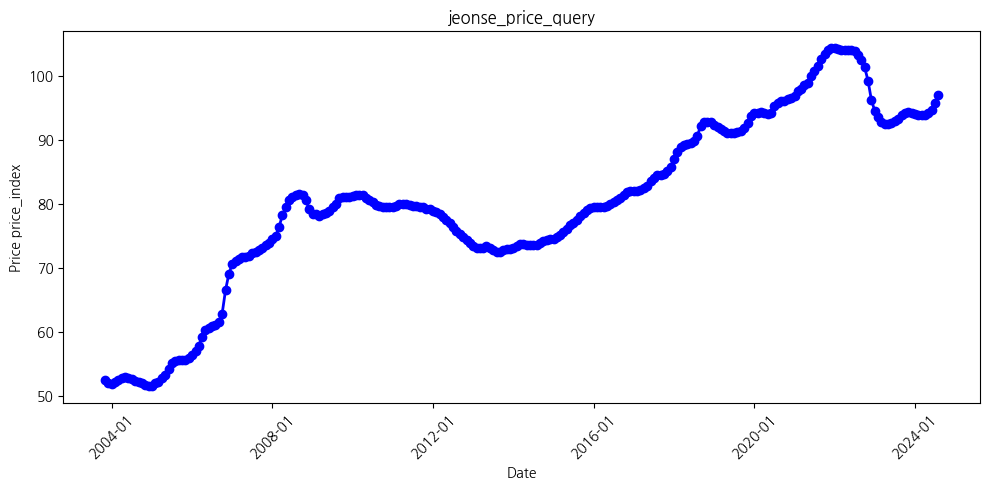

In [8]:
news_keyword_chart()
property_price_index_chart()
unsold_status_chart()
jeonse_price_chart()